# Exploration of the Mental Health Dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay


# models used
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

# Loading the datasets

In [ ]:
df_train = pd.read_csv("../data/train/train.csv")
df_test = pd.read_csv("../data/test/test.csv")

In [3]:
df_train

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


# Performing EDA

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [5]:
df_train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [6]:
df_train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [7]:
cat_cols = df_train.select_dtypes(include = ["object"])
for i in cat_cols:
    print(i)
    print(cat_cols[i].unique())
    print("------------------------------------------------\n")

Name
['Aaradhya' 'Vivan' 'Yuvraj' 'Rhea' 'Vani' 'Ritvik' 'Rajveer' 'Aishwarya'
 'Simran' 'Utkarsh' 'Aahana' 'Tejas' 'Aadhya' 'Kiran' 'Aditi' 'Suhani'
 'Jiya' 'Bhavesh' 'Armaan' 'Ishaani' 'Prachi' 'Pratyush' 'Abhinav'
 'Siddhesh' 'Aditya' 'Aarav' 'Asha' 'Kashish' 'Prisha' 'Chhavi' 'Tanmay'
 'Vihaan' 'Shiv' 'Anvi' 'Darsh' 'Samar' 'Raunak' 'Mahi' 'Shaurya' 'Vidya'
 'Jai' 'Ayush' 'Ansh' 'Anand' 'Yashvi' 'Shrey' 'Ritika' 'Mihir' 'Isha'
 'Arjun' 'Rohan' 'Pratham' 'Nirvaan' 'Ishaan' 'Aarya' 'Riya' 'Aariv'
 'Raghavendra' 'Mahika' 'Abhishek' 'Harshil' 'Janvi' 'Kartikeya' 'Shivam'
 'Advait' 'Reyansh' 'Saanvi' 'Ivaan' 'Pallavi' 'Sneha' 'Ayaan' 'Aakash'
 'Raghav' 'Satyam' 'Aarush' 'Vibha' 'Rupal' 'Sanya' 'Mira' 'Rashi' 'Shlok'
 'Harsha' 'Divya' 'Pranav' 'Hrithik' 'Tushar' 'Garima' 'Zoya' 'Kian'
 'Navya' 'Lakshay' 'Kriti' 'Palak' 'Aryan' 'Parth' 'Ishan' 'Rupak'
 'Atharv' 'Aarti' 'Anirudh' 'Kabir' 'Sanjeev' 'Sanket' 'Tara' 'Gagan'
 'Anjali' 'Gaurav' 'Vikram' 'Yogesh' 'Ila' 'Rishi' 'Ayansh' 'Kolkata'

Alot of invalid values in the features

In [ ]:
# List of valid professions
valid_professions = [
    'Chef', 'Teacher', 'Business Analyst', 'Financial Analyst', 'Chemist', 'Electrician', 
    'Software Engineer', 'Data Scientist', 'Plumber', 'Marketing Manager', 'Accountant', 
    'Entrepreneur', 'HR Manager', 'UX/UI Designer', 'Content Writer', 'Educational Consultant', 
    'Civil Engineer', 'Manager', 'Pharmacist', 'Architect', 'Mechanical Engineer', 
    'Customer Support', 'Consultant', 'Judge', 'Researcher', 'Pilot', 'Graphic Designer', 
    'Travel Consultant', 'Digital Marketer', 'Lawyer', 'Research Analyst', 'Sales Executive', 
    'Doctor', 'Unemployed', 'Investment Banker', 'Family Consultant', 'Medical Doctor', 
    'Working Professional', 'Student', 'Analyst'
]



# Replace invalid professions with 'others', keep NaN values as is

df_train['Profession'] = df_train['Profession'].apply(lambda x: x if pd.isna(x) or x in valid_professions else 'others')
df_test['Profession'] = df_test['Profession'].apply(lambda x: x if pd.isna(x) or x in valid_professions else 'others')

In [9]:
df_train["Profession"].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'others', 'Chemist',
       'Electrician', 'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Educational Consultant',
       'Civil Engineer', 'Manager', 'Pharmacist', 'Financial Analyst',
       'Architect', 'Mechanical Engineer', 'Customer Support',
       'Consultant', 'Judge', 'Researcher', 'Pilot', 'Graphic Designer',
       'Travel Consultant', 'Digital Marketer', 'Lawyer',
       'Research Analyst', 'Sales Executive', 'Doctor', 'Unemployed',
       'Investment Banker', 'Family Consultant', 'Student',
       'Medical Doctor', 'Working Professional', 'Analyst'], dtype=object)

In [ ]:
valid_sleep_duration = ['Less than 5 hours','5-6 hours','6-7 hours','6-8 hours','7-8 hours','8-9 hours','More than 8 hours']


df_train['Sleep Duration']= df_train['Sleep Duration'].apply(lambda x: x if x in valid_sleep_duration else 'Unknown')
df_test['Sleep Duration']= df_test['Sleep Duration'].apply(lambda x: x if x in valid_sleep_duration else 'Unknown')

In [11]:
df_train['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Unknown', '6-8 hours', '6-7 hours', '8-9 hours'], dtype=object)

In [12]:
valid_degrees = ['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch', 'BCA', 'BE',
                 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA', 'Class 12', 'M.Tech', 'PhD',
                 'M.Ed', 'MSc', 'B.Tech', 'LLM', 'MBBS', 'M.Pharm', 'MPA', 'M.Arch', 'BEd', 
                 'B.Sc', 'MTech', 'BPharm', 'BPA', 'ACA', 'LHM', 'M.S', 'HCA']



# Replace invalid degrees with 'Unknown'

df_train['Degree'] = df_train['Degree'].apply(lambda x: x if pd.isna(x) or x in valid_degrees else 'Unknown')
df_test['Degree'] = df_test['Degree'].apply(lambda x: x if x in valid_degrees else 'Unknown')

In [13]:
df_train['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'Unknown', 'MPA', 'BEd', 'B.Sc', 'BPharm',
       'M.Arch', 'MTech', 'BPA', 'ACA', 'LHM', 'HCA', 'M.S', nan],
      dtype=object)

In [ ]:
valid_dietary_habits = ['Healthy', 'Unhealthy', 'Moderate']


# Replace invalid dietary habits with 'Unknown'
df_train['Dietary Habits'] = df_train['Dietary Habits'].apply(lambda x: x if x in valid_dietary_habits else 'Unknown')
df_test['Dietary Habits'] = df_test['Dietary Habits'].apply(lambda x: x if x in valid_dietary_habits else 'Unknown')

In [15]:
df_train['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Unknown'], dtype=object)

In [ ]:
# dropping the irralvent features
df_train.drop(["Name","City","id"],axis = 1,inplace = True)
df_test.drop(["Name","City","id"],axis = 1,inplace = True)

In [17]:
df_train.head()

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


# Data Visualization

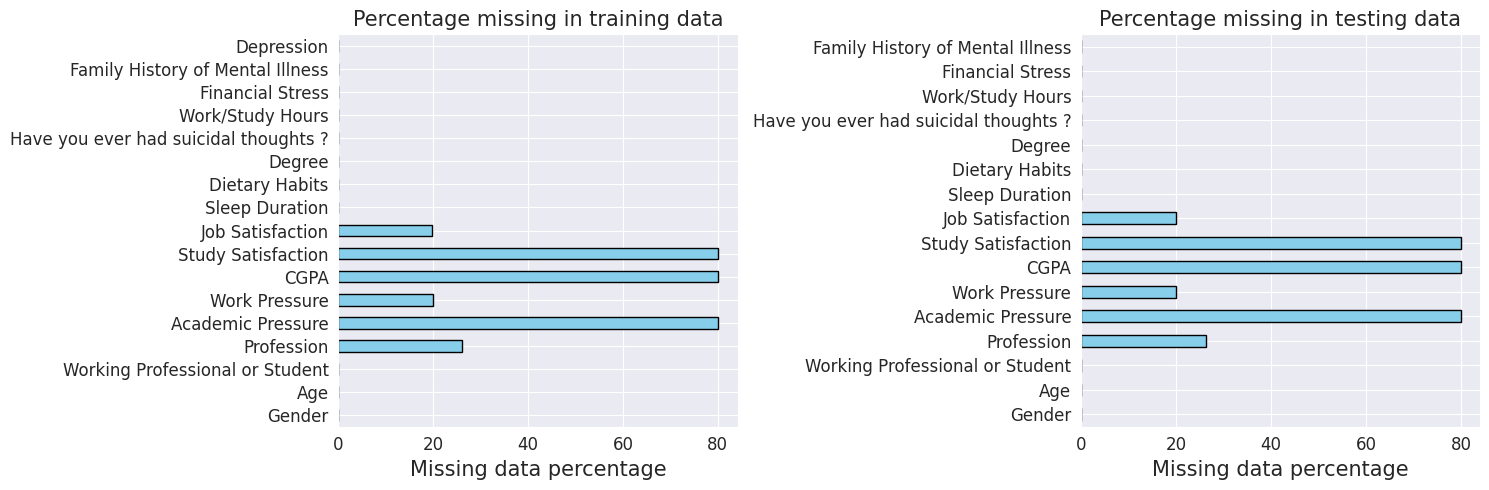

In [18]:
missing_training_data = (df_train.isnull().sum())*100/len(df_train)
missing_testing_data = (df_test.isnull().sum())*100/len(df_test)



plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
missing_training_data.plot(kind = "barh",color = "skyblue", edgecolor = "black")
plt.title("Percentage missing in training data",fontsize = 15)
plt.xlabel("Missing data percentage",fontsize = 15)
plt.tick_params(axis = "both",labelsize = 12)

plt.subplot(1,2,2)
missing_testing_data.plot(kind = "barh",color = "skyblue", edgecolor = "black")
plt.title("Percentage missing in testing data",fontsize = 15)
plt.xlabel("Missing data percentage",fontsize = 15)
plt.tick_params(axis = "both",labelsize = 12)

plt.tight_layout(h_pad = 3)
plt.show()

# Visualization of Training Data

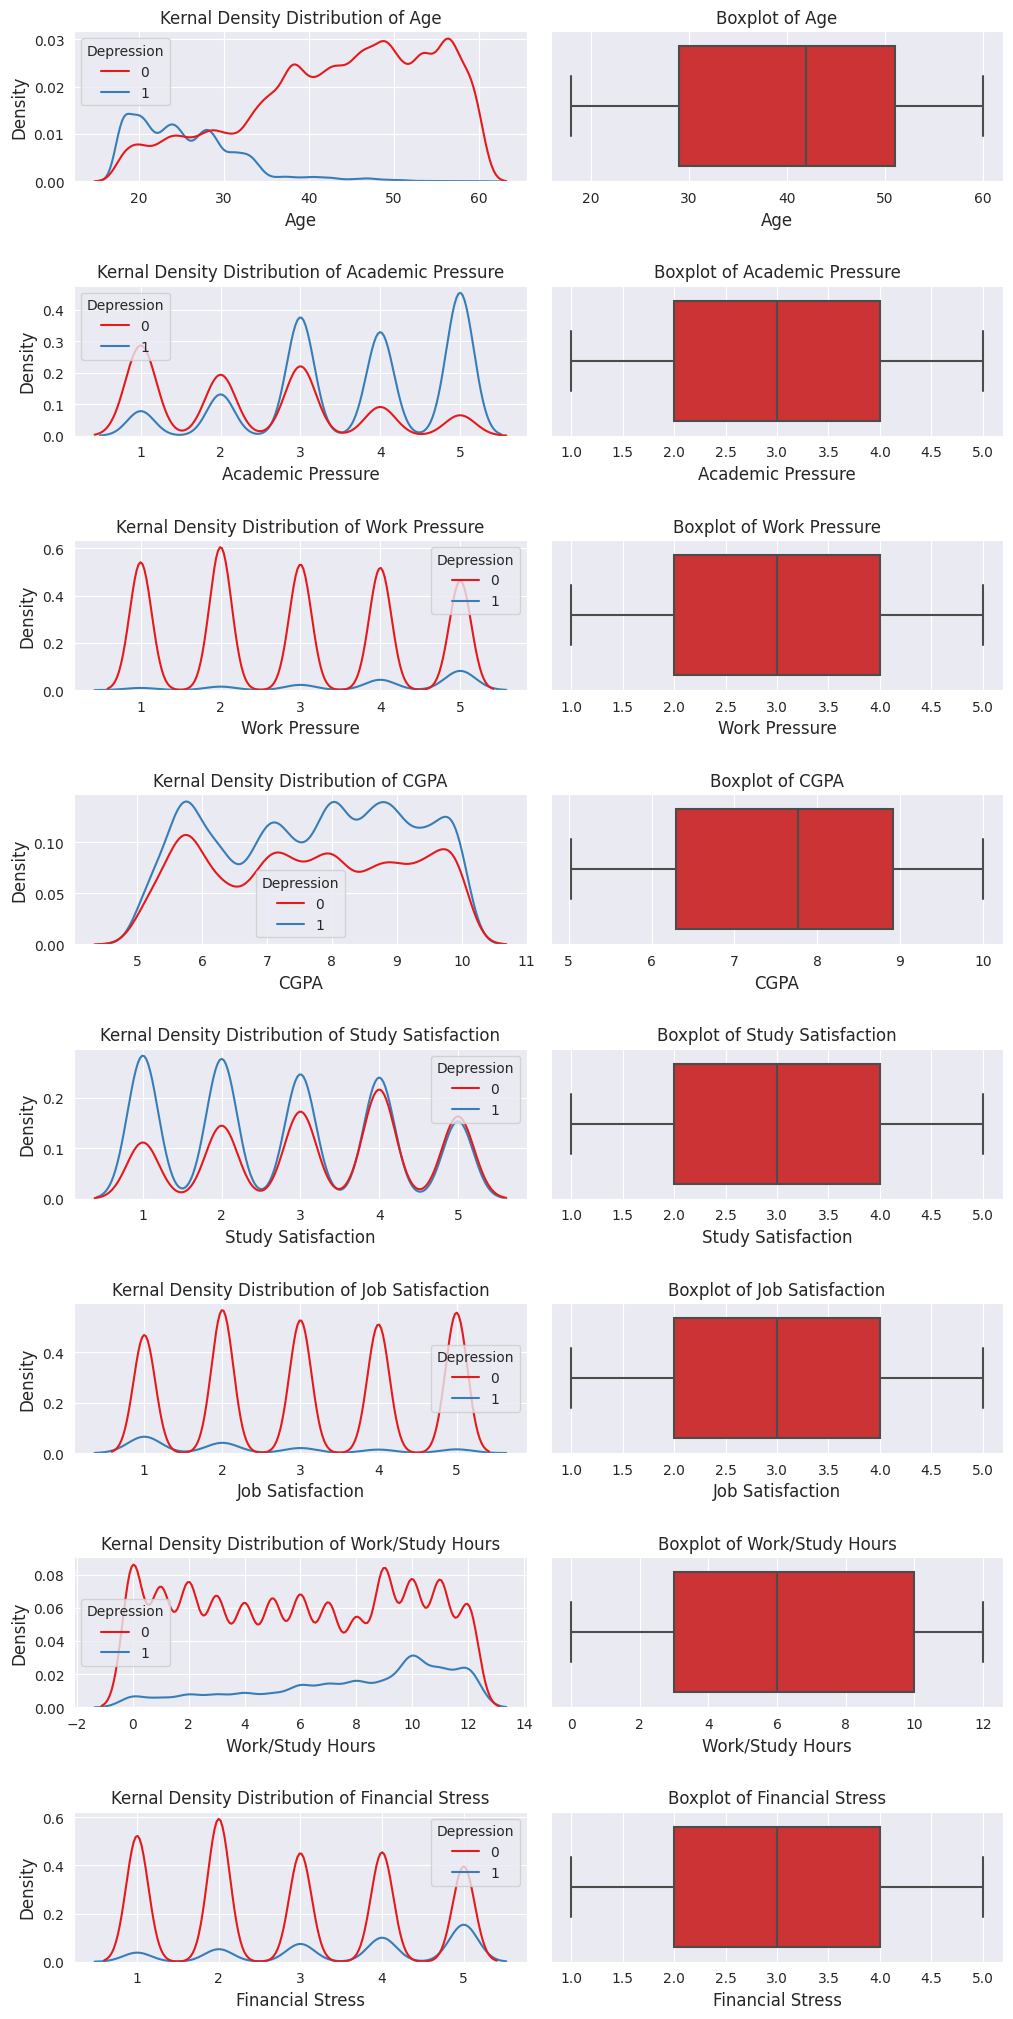

In [19]:
num_cols = df_train.select_dtypes(exclude = ["object"]).drop("Depression",axis = 1)

plt.figure(figsize = (15,30))

for i,col in enumerate(num_cols):
    plt.subplot(12,3,i*3+1)
    sns.kdeplot(data = df_train, x = col,hue = "Depression",palette = "Set1")
    plt.title(f" of {col}",fontsize = 12)
    plt.xlabel(f"{col}",fontsize = 12)
    plt.ylabel("Density",fontsize = 12)
    plt.title(f"Kernal Density Distribution of {col}",fontsize = 12)

    plt.subplot(12,3,i * 3 + 2 )
    sns.boxplot(data = df_train, x = col,hue = "Depression",palette = "Set1")
    plt.title(f"Boxplot of {col}",fontsize = 12)
    plt.xlabel(f"{col}",fontsize = 12)

plt.tight_layout(h_pad = 2.5)
plt.show()

# Visualization of Testing Data

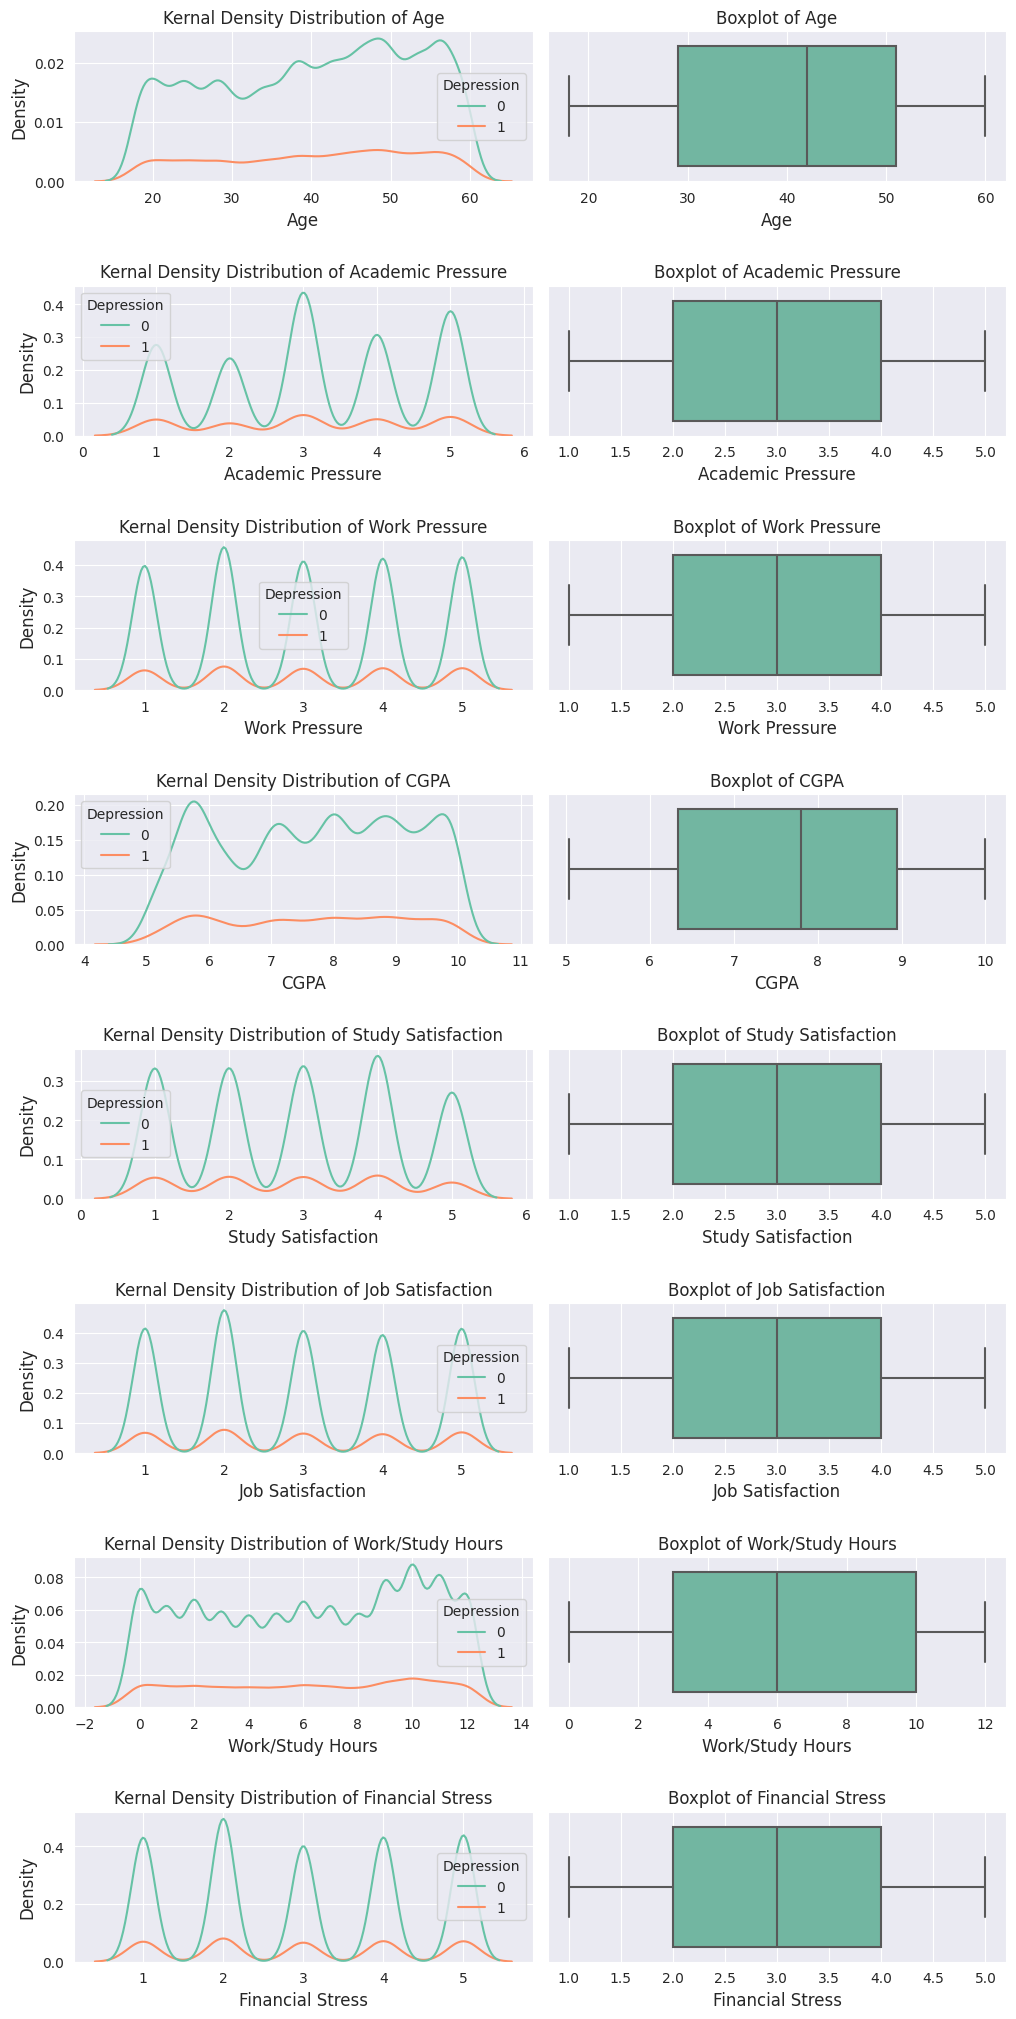

In [20]:
plt.figure(figsize = (15,30))

for i,col in enumerate(num_cols):
    plt.subplot(12,3,i*3+1)
    sns.kdeplot(data = df_test, x = col,hue = df_train["Depression"],palette = "Set2")
    plt.title(f" of {col}",fontsize = 12)
    plt.xlabel(f"{col}",fontsize = 12)
    plt.ylabel("Density",fontsize = 12)
    plt.title(f"Kernal Density Distribution of {col}",fontsize = 12)

    plt.subplot(12,3,i * 3 + 2 )
    sns.boxplot(data = df_test, x = col,hue = df_train["Depression"],palette = "Set2")
    plt.title(f"Boxplot of {col}",fontsize = 12)
    plt.xlabel(f"{col}",fontsize = 12)


plt.tight_layout(h_pad = 2.5)
plt.show()

# Categorical Features Visualization

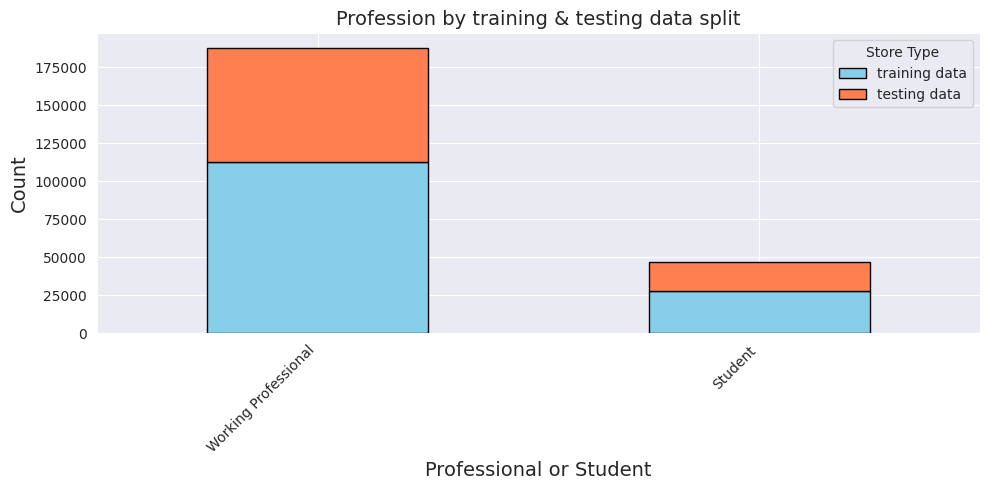

In [21]:
profession_value_train = df_train["Working Professional or Student"].value_counts()
profession_value_test = df_test["Working Professional or Student"].value_counts()

distribution = pd.DataFrame({
    "training data": profession_value_train,
    "testing data": profession_value_test

}).fillna(0)


colors = ["skyblue", "coral"]

distribution.plot(kind="bar", stacked=True, figsize=(10, 5), color=colors, edgecolor = "black")
plt.title("Profession by training & testing data split",fontsize = 14)
plt.xlabel("Professional or Student",fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.legend(title="Store Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

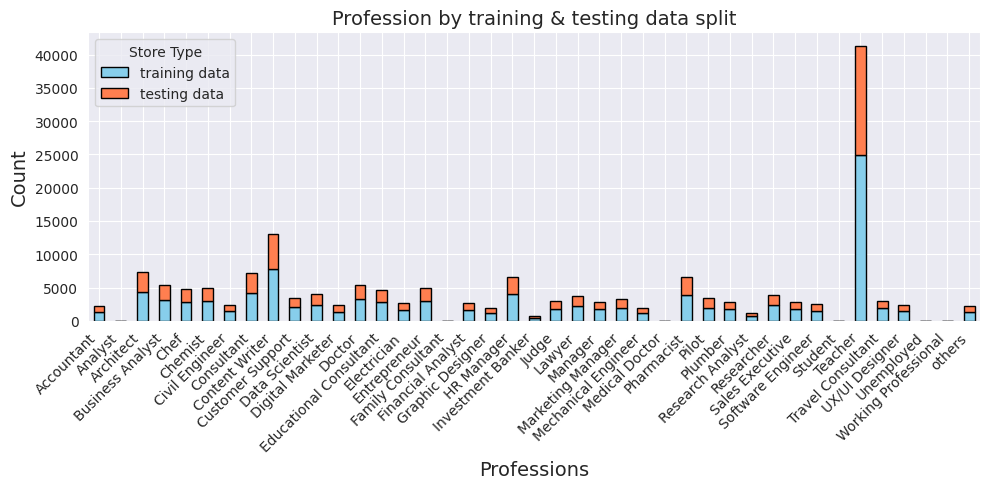

In [22]:
profession_train = df_train["Profession"].value_counts()
profession_test = df_test["Profession"].value_counts()

distribution = pd.DataFrame({
    "training data": profession_train,
    "testing data": profession_test
}).fillna(0)

colors = ["skyblue", "coral"]

distribution.plot(kind="bar", stacked=True, figsize=(10, 5),color = colors, edgecolor = "black")
plt.title("Profession by training & testing data split",fontsize = 14)
plt.xlabel("Professions",fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.legend(title="Store Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

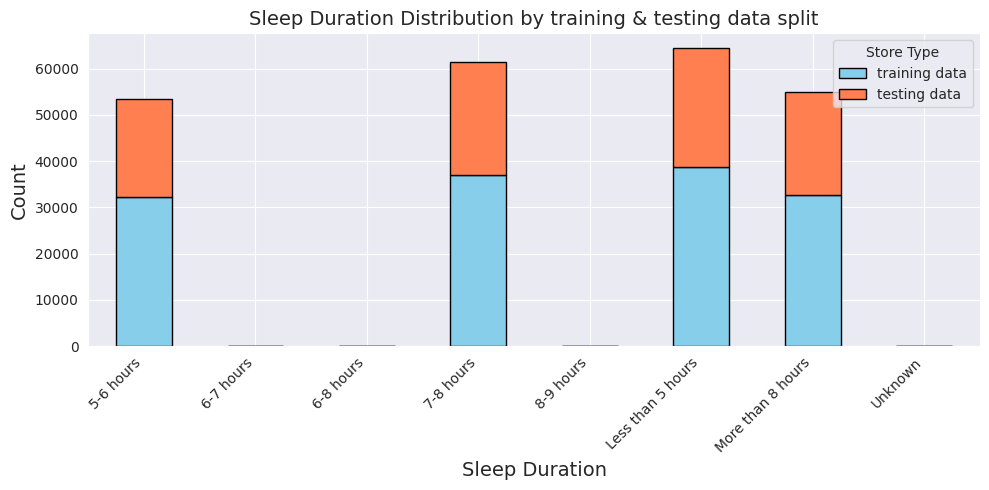

In [23]:
sleep_train = df_train["Sleep Duration"].value_counts()
sleep_test = df_test["Sleep Duration"].value_counts()

distribution = pd.DataFrame({
    "training data": sleep_train,
    "testing data": sleep_test
}).fillna(0)

colors = ["skyblue", "coral"]

distribution.plot(kind="bar", stacked=True, figsize=(10, 5),color = colors, edgecolor = "black")
plt.title("Sleep Duration Distribution by training & testing data split",fontsize = 14)
plt.xlabel("Sleep Duration",fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.legend(title="Store Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

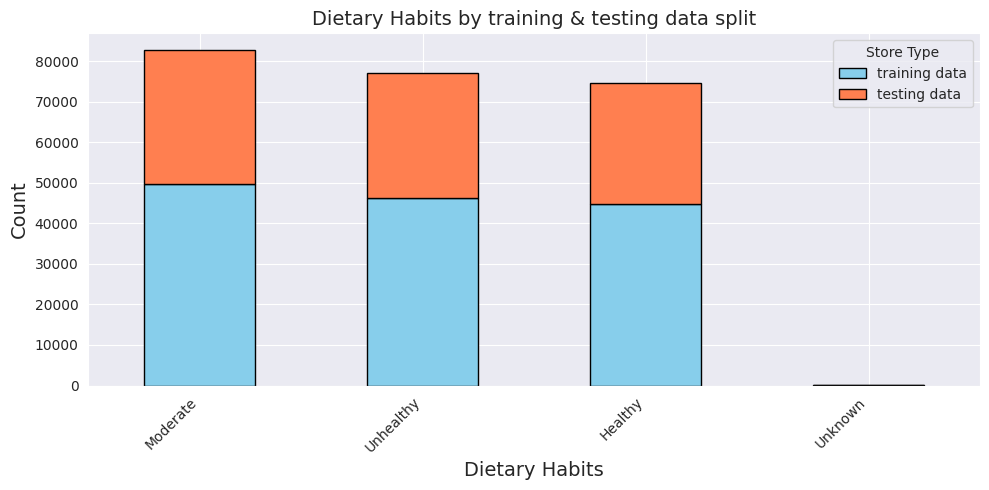

In [24]:
diet_train = df_train["Dietary Habits"].value_counts()
diet_test = df_test["Dietary Habits"].value_counts()

distribution = pd.DataFrame({
    "training data": diet_train,
    "testing data": diet_test
}).fillna(0)

colors = ["skyblue", "coral"]

distribution.plot(kind="bar", stacked=True, figsize=(10, 5),color = colors, edgecolor = "black")
plt.title("Dietary Habits by training & testing data split",fontsize = 14)
plt.xlabel("Dietary Habits",fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.legend(title="Store Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

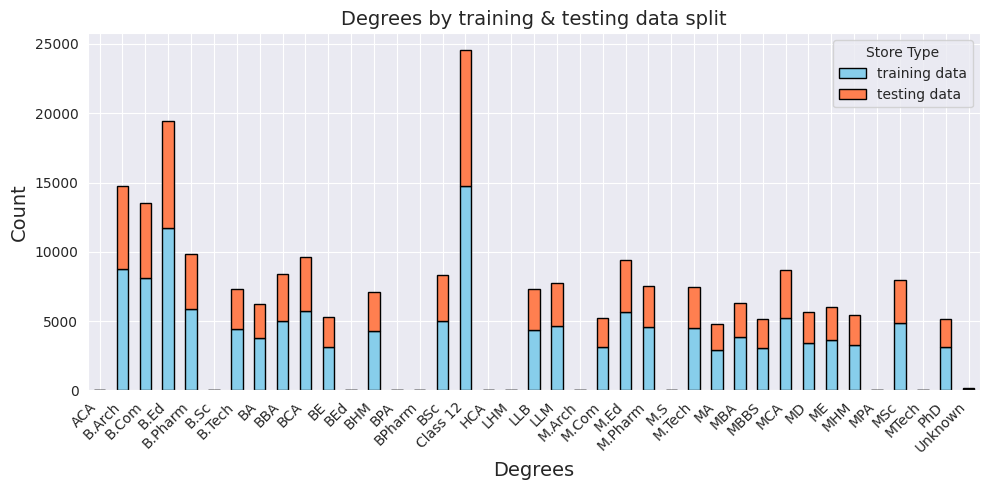

In [25]:
degree_train = df_train["Degree"].value_counts()
degree_test = df_test["Degree"].value_counts()

distribution = pd.DataFrame({
    "training data": degree_train,
    "testing data": degree_test
}).fillna(0)

colors = ["skyblue", "coral"]

distribution.plot(kind="bar", stacked=True, figsize=(10, 5),color = colors, edgecolor = "black")
plt.title("Degrees by training & testing data split",fontsize = 14)
plt.xlabel("Degrees",fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.legend(title="Store Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

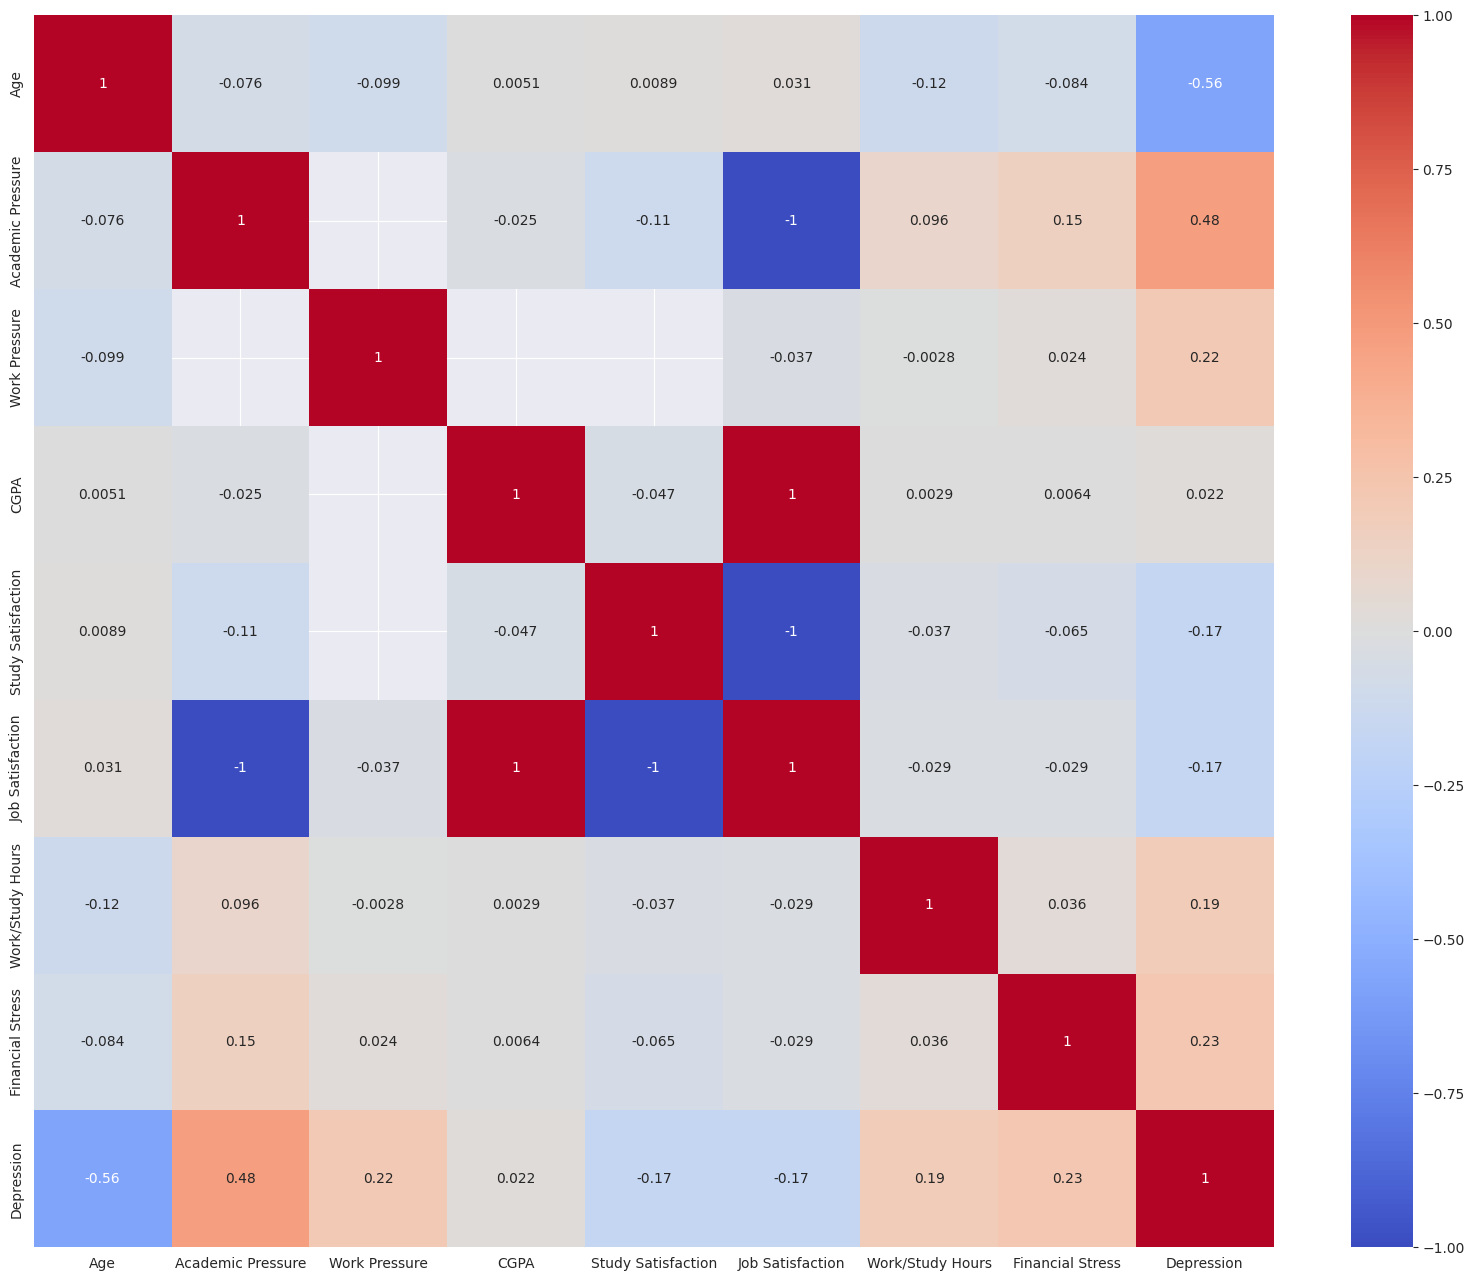

In [26]:
plt.figure(figsize = (20,16))
sns.heatmap(df_train.corr(numeric_only = True),annot = True, cmap = "coolwarm")
plt.show()

# Data Preprocessing

### imputing the numerical features

In [ ]:
# Filling numerical features with 0

numerical_features = ['Job Satisfaction', 'Academic Pressure', 'Study Satisfaction', 
                      'Financial Stress', 'Work Pressure']

for col in numerical_features:
    df_train[col].fillna(0, inplace=True)
    df_test[col].fillna(0, inplace=True)

# Filling categorical features with mode
categorical_features = ['Profession', 'Dietary Habits', 'Degree']

for col in categorical_features:
    mode_train = df_train[col].mode()[0]
    mode_test = df_test[col].mode()[0]
    df_train[col].fillna(mode_train, inplace=True)
    df_test[col].fillna(mode_test, inplace=True)

# Handling CGPA separately
df_train['CGPA'].fillna(df_train['CGPA'].mean(), inplace=True)
df_test['CGPA'].fillna(df_test['CGPA'].mean(), inplace=True)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Age                                    140700 non-null  float64
 2   Working Professional or Student        140700 non-null  object 
 3   Profession                             140700 non-null  object 
 4   Academic Pressure                      140700 non-null  float64
 5   Work Pressure                          140700 non-null  float64
 6   CGPA                                   140700 non-null  float64
 7   Study Satisfaction                     140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  object 
 10  Dietary Habits                         140700 non-null  

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 93800 non-null  object 
 1   Age                                    93800 non-null  float64
 2   Working Professional or Student        93800 non-null  object 
 3   Profession                             93800 non-null  object 
 4   Academic Pressure                      93800 non-null  float64
 5   Work Pressure                          93800 non-null  float64
 6   CGPA                                   93800 non-null  float64
 7   Study Satisfaction                     93800 non-null  float64
 8   Job Satisfaction                       93800 non-null  float64
 9   Sleep Duration                         93800 non-null  object 
 10  Dietary Habits                         93800 non-null  object 
 11  De

# Creating datapiplines

In [30]:
# Custom function for frequency encoding

class FrequencyEncoder(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.encoding_map = {}

    def fit(self,X,y = None):
        for col in X.columns:
            frequency_encoding = X[col].value_counts()/len(X)
            self.encoding_map[col] = frequency_encoding.to_dict()

        return self

    def transform(self,X):
        X = X.copy()  

        for col in X.columns:
            X[col] = X[col].map(self.encoding_map[col]).fillna(0)

        return X

In [31]:
# Separating the columns depending on which encoder to use for encoding

onehot_encoders = ["Gender","Working Professional or Student","Dietary Habits","Have you ever had suicidal thoughts ?",
                   "Family History of Mental Illness"]

frequency_encoders = ["Profession","Sleep Duration","Degree"]

# Numerical Columns
numerical_features = ["Age", "Academic Pressure", "Work Pressure", "CGPA", "Study Satisfaction", "Job Satisfaction", 
                      "Work/Study Hours", "Financial Stress"]


# Categorical Pipeline
categorical_pipeline_f = Pipeline([("FrequencyEncoder",FrequencyEncoder())])
categorical_pipeline_one = Pipeline([("OneHotEncoder",OneHotEncoder(handle_unknown='ignore',drop = "first"))])

# Numerical Pipeline
numerical_pipeline = Pipeline([("scaler",StandardScaler())])

# applying the ColumnTransformer
transformers = ColumnTransformer([("frequency",categorical_pipeline_f,frequency_encoders),
                                  ("onehot",categorical_pipeline_one,onehot_encoders),
                                  ("num",numerical_pipeline,numerical_features)])

# Model Building

In [32]:
X = df_train.drop("Depression",axis = 1)
y = df_train["Depression"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

#### Gradient Boosting Classifier

In [33]:
gb_clf = GradientBoostingClassifier()


model1 = Pipeline([("transformers",transformers),
                   ("gb_clf",gb_clf)])

In [34]:
model1.fit(X_train,y_train)

Pipeline(steps=[('transformers',
                 ColumnTransformer(transformers=[('frequency',
                                                  Pipeline(steps=[('FrequencyEncoder',
                                                                   FrequencyEncoder())]),
                                                  ['Profession',
                                                   'Sleep Duration',
                                                   'Degree']),
                                                 ('onehot',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Working Professional or '
                                                   'Student',
                                                   'Dietary Habits',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress'])])),
                ('gb_clf', GradientBoostingClassifier())])

In [35]:
model1.score(X_train,y_train)

0.9380330490405118

In [36]:
y_pred1 = model1.predict(X_test)

#### XGBoost Classifier

In [37]:
xgb_clf = XGBClassifier()

model2 = Pipeline([("transformers",transformers),
                   ("xgb_clf",xgb_clf)])

In [38]:
model2.fit(X_train,y_train)

Pipeline(steps=[('transformers',
                 ColumnTransformer(transformers=[('frequency',
                                                  Pipeline(steps=[('FrequencyEncoder',
                                                                   FrequencyEncoder())]),
                                                  ['Profession',
                                                   'Sleep Duration',
                                                   'Degree']),
                                                 ('onehot',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Working Professional or '
                                                   'Student',
                                                   'Dietary Habits',
                                                   'Have you ever had su...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [39]:
model2.score(X_train,y_train)

0.9521855010660981

In [40]:
y_pred2 = model2.predict(X_test)

#### LightGBM Classifier

In [41]:
lgbm_clf = LGBMClassifier()

model3 = Pipeline([("transformers",transformers),
                   ("lgbm_clf",lgbm_clf)])

In [42]:
model3.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 20413, number of negative: 92147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181352 -> initscore=-1.507213
[LightGBM] [Info] Start training from score -1.507213


Pipeline(steps=[('transformers',
                 ColumnTransformer(transformers=[('frequency',
                                                  Pipeline(steps=[('FrequencyEncoder',
                                                                   FrequencyEncoder())]),
                                                  ['Profession',
                                                   'Sleep Duration',
                                                   'Degree']),
                                                 ('onehot',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Working Professional or '
                                                   'Student',
                                                   'Dietary Habits',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress'])])),
                ('lgbm_clf', LGBMClassifier())])

In [43]:
model3.score(X_train,y_train)

0.9431236673773987

In [44]:
y_pred3 = model3.predict(X_test)

#### Catboost Classifier

In [45]:
# Separating the columns depending on which encoder to use for encoding

categorical_features = ["Gender", "Working Professional or Student", "Dietary Habits", "Have you ever had suicidal thoughts ?",
                        "Family History of Mental Illness","Profession", "Sleep Duration", "Degree"]



# Numerical Columns
numerical_features = ["Age", "Academic Pressure", "Work Pressure", "CGPA", "Study Satisfaction", "Job Satisfaction", 
                      "Work/Study Hours", "Financial Stress"]



# Categorical Pipeline (Handling missing values by imputing with "missing")
categorical_pipeline = Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="missing"))])


# Numerical Pipeline 
numerical_pipeline = Pipeline([("imputer", SimpleImputer(strategy="mean")),
                               ("scaler", StandardScaler())])


# Applying the ColumnTransformer
transformers_cat = ColumnTransformer([("cat", categorical_pipeline, categorical_features),
                                      ("num", numerical_pipeline, numerical_features)])




In [46]:
categorical_feature_indices = list(range(len(categorical_features)))

cat_clf = CatBoostClassifier(cat_features = categorical_feature_indices)

model4 = Pipeline([("transformers_cat",transformers_cat),
                   ("cat_clf",cat_clf)])

In [47]:
model4.fit(X_train,y_train)

Learning rate set to 0.077424
0:	learn: 0.5678877	total: 180ms	remaining: 3m
1:	learn: 0.4734778	total: 295ms	remaining: 2m 27s
2:	learn: 0.4072278	total: 413ms	remaining: 2m 17s
3:	learn: 0.3590870	total: 521ms	remaining: 2m 9s
4:	learn: 0.3199781	total: 630ms	remaining: 2m 5s
5:	learn: 0.2918575	total: 736ms	remaining: 2m 1s
6:	learn: 0.2679716	total: 844ms	remaining: 1m 59s
7:	learn: 0.2497228	total: 950ms	remaining: 1m 57s
8:	learn: 0.2351755	total: 1.05s	remaining: 1m 56s
9:	learn: 0.2238950	total: 1.16s	remaining: 1m 54s
10:	learn: 0.2141723	total: 1.27s	remaining: 1m 54s
11:	learn: 0.2074132	total: 1.37s	remaining: 1m 52s
12:	learn: 0.2017814	total: 1.46s	remaining: 1m 51s
13:	learn: 0.1970956	total: 1.57s	remaining: 1m 50s
14:	learn: 0.1925477	total: 1.68s	remaining: 1m 50s
15:	learn: 0.1880887	total: 1.77s	remaining: 1m 49s
16:	learn: 0.1849314	total: 1.88s	remaining: 1m 48s
17:	learn: 0.1819244	total: 1.99s	remaining: 1m 48s
18:	learn: 0.1798289	total: 2.1s	remaining: 1m 48s


Pipeline(steps=[('transformers_cat',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'))]),
                                                  ['Gender',
                                                   'Working Professional or '
                                                   'Student',
                                                   'Dietary Habits',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Degree']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress'])])),
                ('cat_clf',
                 <catboost.core.CatBoostClassifier object at 0x79251110e8f0>)])

In [48]:
model4.score(X_train,y_train)

0.9468816631130064

In [49]:
y_pred4 = model4.predict(X_test)

#### Cross Validiation & Hyperperam Tunning

In [50]:
# k = 5

# kf = KFold(n_splits = k , shuffle = True , random_state = 42)



# param_dist = {

#     'cat_clf__iterations': 900,

#     'cat_clf__learning_rate': 0.001, 

#     'cat_clf__depth': 14

#     'cat_clf__l2_leaf_reg': 100.0,  

#     'cat_clf__subsample': 1.0,  

#     'cat_clf__bagging_temperature': 0.775,

#     'cat_clf__max_bin':5000,

#     'cat_clf__grow_policy': ['Depthwise'],  

#     'cat_clf__min_data_in_leaf': 1, 

#     'cat_clf__early_stopping_rounds': 100  

# }



# # Set up RandomizedSearchCV

# cat_boost = RandomizedSearchCV(estimator=model4,param_distributions=param_dist,n_iter=100,cv=kf,  verbose=2,  random_state=42)

In [51]:
# After tunning the model

cat_clf = CatBoostClassifier(
    iterations=100,
    learning_rate= 0.08114394459649094,
    depth=14,
    l2_leaf_reg= 0.7047064221215757,
    subsample=1.0,
    bagging_temperature=0.775,
    max_bin=5000,
    grow_policy='Depthwise',
    min_data_in_leaf=1,
    cat_features = categorical_feature_indices
)


model4 = Pipeline([("transformers_cat",transformers_cat),
                   ("cat_clf",cat_clf)])

In [52]:
# Train the model

model4.fit(X_train, y_train)

0:	learn: 0.6313606	total: 347ms	remaining: 34.4s
1:	learn: 0.5786930	total: 638ms	remaining: 31.2s
2:	learn: 0.5332987	total: 946ms	remaining: 30.6s
3:	learn: 0.4936414	total: 1.24s	remaining: 29.8s
4:	learn: 0.4587992	total: 1.53s	remaining: 29.1s
5:	learn: 0.4281174	total: 1.81s	remaining: 28.4s
6:	learn: 0.4007804	total: 2.12s	remaining: 28.2s
7:	learn: 0.3763684	total: 2.38s	remaining: 27.4s
8:	learn: 0.3544234	total: 2.73s	remaining: 27.6s
9:	learn: 0.3345125	total: 3.11s	remaining: 28s
10:	learn: 0.3164308	total: 3.55s	remaining: 28.7s
11:	learn: 0.3002611	total: 3.93s	remaining: 28.8s
12:	learn: 0.2856778	total: 4.32s	remaining: 28.9s
13:	learn: 0.2723485	total: 4.7s	remaining: 28.9s
14:	learn: 0.2601323	total: 5.03s	remaining: 28.5s
15:	learn: 0.2492405	total: 5.3s	remaining: 27.8s
16:	learn: 0.2390388	total: 5.62s	remaining: 27.4s
17:	learn: 0.2298849	total: 5.91s	remaining: 26.9s
18:	learn: 0.2210039	total: 6.25s	remaining: 26.6s
19:	learn: 0.2131790	total: 6.59s	remaining: 

Pipeline(steps=[('transformers_cat',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'))]),
                                                  ['Gender',
                                                   'Working Professional or '
                                                   'Student',
                                                   'Dietary Habits',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Family History of Mental '
                                                   'Illness',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Degree']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work Pressure', 'CGPA',
                                                   'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours',
                                                   'Financial Stress'])])),
                ('cat_clf',
                 <catboost.core.CatBoostClassifier object at 0x79251110ece0>)])

In [53]:
model4.score(X_train,y_train)

0.9645877754086709

In [54]:
y_pred4 = model4.predict(X_test)

In [55]:
models = {
    "CatBoost": model4,
    "XGBoost": model2,
    "LightGBM": model3,
    "GradientBoosting": model1
}


results = {
    "Model": [],
    "Accuracy": []
}


for model_name, model in models.items():
    accuracy = model.score(X_test, y_test)
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)

# Create a DataFrame
results_df = pd.DataFrame(results)

In [56]:
results_df

,Model,Accuracy
0,CatBoost,0.937598
1,XGBoost,0.937918
2,LightGBM,0.938522
3,GradientBoosting,0.936851


In [ ]:
# submission using LightGBM
# df_test = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")
df_test = pd.read_csv("data/test/test.csv")


submission = pd.DataFrame(df_test["id"])
predictions = model3.predict(df_test)
submission["Depression"] = predictions
submission.to_csv("Submission_mental_health1.csv",index = False)

In [58]:
submission

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1
